In [18]:
import awkward as ak
import numpy as np
import hist
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep
from coffea.nanoevents import NanoEventsFactory, TreeMakerSchema

In [13]:
samples = [
    {"mdark": 20, "legname": r"$m_{\text{dark}} = 20$ GeV", "fname": "root://cmseos.fnal.gov//store/user/lpcdarkqcd/schannel_UL/2017/MiniNtuples/PrivateSamples.SVJ_MC2017_s-channel_mMed-3000_mDark-20_rinv-0p3_alpha-peak_13TeV-pythia8_n-1000_0_RA2AnalysisTree.root"},
    {"mdark": 50, "legname": r"$m_{\text{dark}} = 50$ GeV", "fname": "root://cmseos.fnal.gov//store/user/lpcdarkqcd/schannel_UL/2017/MiniNtuples/PrivateSamples.SVJ_MC2017_s-channel_mMed-3000_mDark-50_rinv-0p3_alpha-peak_13TeV-pythia8_n-1000_0_RA2AnalysisTree.root"},
    {"mdark": 100, "legname": r"$m_{\text{dark}} = 100$ GeV", "fname": "root://cmseos.fnal.gov//store/user/lpcdarkqcd/schannel_UL/2017/MiniNtuples/PrivateSamples.SVJ_MC2017_s-channel_mMed-3000_mDark-100_rinv-0p3_alpha-peak_13TeV-pythia8_n-1000_0_RA2AnalysisTree.root"},
]

In [14]:
for sample in samples:
    sample["events"] = NanoEventsFactory.from_root(
        file=sample["fname"],
        treepath="TreeMaker2/PreSelection",
        schemaclass=TreeMakerSchema,
        metadata={"dataset": sample["legname"]},
    ).events()


In [15]:
for sample in samples:
    events = sample["events"]
    events["darkHadronJetMassAll"] = ak.nan_to_num(events["GenJetsAK8"][:,0:2].darkHadronJets.mass,nan=0)
    events["darkHadronJetMassAllMax"] = ak.max(events["darkHadronJetMassAll"], axis=2)
    events["darkHadronJetMassAllAvg"] = ak.mean(events["darkHadronJetMassAll"], axis=2)
    some_mask = events["GenJetsAK8"][:,0:2].darkHadronJetsMultiplicity>int(0.6*sample["mdark"])
    events["darkHadronJetMassSome"] = ak.nan_to_num(events["GenJetsAK8"][:,0:2].darkHadronJets.mass[some_mask],nan=0)
    events["darkHadronJetMassSomeMax"] = ak.max(events["darkHadronJetMassSome"], axis=2)
    events["darkHadronJetMassSomeAvg"] = ak.mean(events["darkHadronJetMassSome"], axis=2)


/opt/conda/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(


In [19]:
def get_values(var,sample):
    return ak.flatten(sample["events"][var],axis=None)

def fill_hist(var,label,samples):
    hists = {}
    for sample in samples:
        h = (
            hist.Hist.new
            .Reg(24, 0, 120, label=label)
            .Double()
        )
        h.fill(get_values(var,sample),weight=0.5)
        hists[sample["legname"]] = h
        stat = hist.accumulators.Mean().fill(get_values(var,sample))
        print("{} {} {}".format(var, sample["mdark"], np.sqrt(stat.variance)/stat.value))
    return hists

In [20]:
histnames = [
    ("darkHadronJetMassAll",r"$m(j_{\text{dark}}^{\text{gen}})$ [GeV]"),
    ("darkHadronJetMassAllMax",r"$\text{max}(m(j_{\text{dark}}^{\text{gen}}))$ [GeV]"),
    ("darkHadronJetMassAllAvg",r"$\langle m(j_{\text{dark}}^{\text{gen}}) \rangle$ [GeV]"),
    ("darkHadronJetMassSome",r"$m(j_{\text{dark}}^{\text{gen}})$ [GeV]"),
    ("darkHadronJetMassSomeMax",r"$\text{max}(m(j_{\text{dark}}^{\text{gen}}))$ [GeV]"),
    ("darkHadronJetMassSomeAvg",r"$\langle m(j_{\text{dark}}^{\text{gen}}) \rangle$ [GeV]"),
]
allhists = []
for v,l in histnames:
    allhists.append((v,fill_hist(v,l,samples)))

darkHadronJetMassAll 20 1.008126570801981
darkHadronJetMassAll 50 1.2916053705394324
darkHadronJetMassAll 100 1.6048588710703333
darkHadronJetMassAllMax 20 0.4270509113689769
darkHadronJetMassAllMax 50 0.6285370264055122
darkHadronJetMassAllMax 100 0.9012911149593207
darkHadronJetMassAllAvg 20 0.612234692685728
darkHadronJetMassAllAvg 50 0.8022248265931309
darkHadronJetMassAllAvg 100 1.0508596386834688
darkHadronJetMassSome 20 0.29007059030007415
darkHadronJetMassSome 50 0.1795638305682555
darkHadronJetMassSome 100 0.11369461556626839
darkHadronJetMassSomeMax 20 0.201874517849684
darkHadronJetMassSomeMax 50 0.16180413239257793
darkHadronJetMassSomeMax 100 0.11345764360846584
darkHadronJetMassSomeAvg 20 0.23188513116266002
darkHadronJetMassSomeAvg 50 0.16859644526828643
darkHadronJetMassSomeAvg 100 0.11357641686446396


In [9]:
#plt.style.use(hep.style.CMS)
mpl.rcParams.update({
    "axes.labelsize" : 18,
    "legend.fontsize" : 16,
    "xtick.labelsize" : 14,
    "ytick.labelsize" : 14,
    "font.size" : 18,
    "legend.frameon": True,
})
# based on https://github.com/mpetroff/accessible-color-cycles
# red, blue, mauve, orange, purple, gray, 
colors = ["#e42536", "#5790fc", "#964a8b", "#f89c20", "#7a21dd", "#9c9ca1"]
styles = ['--','-.',':',]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

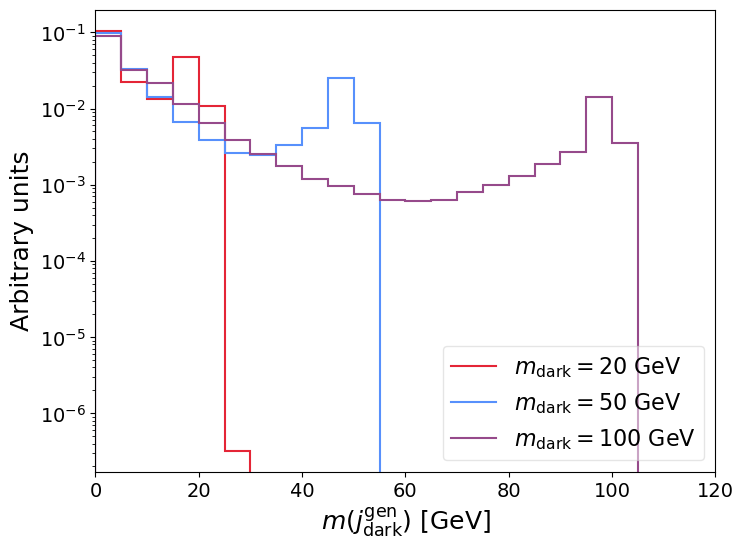

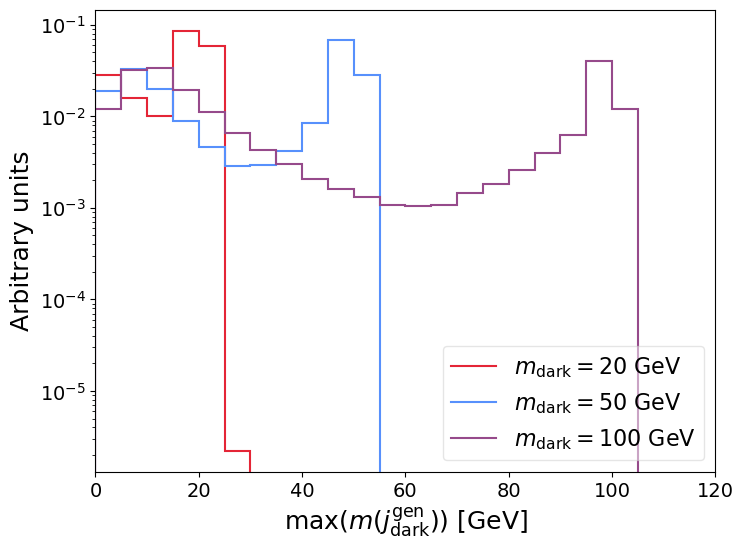

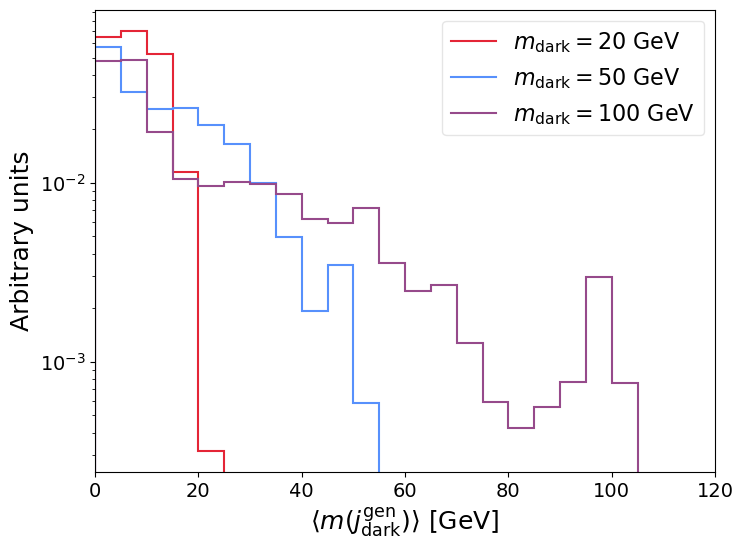

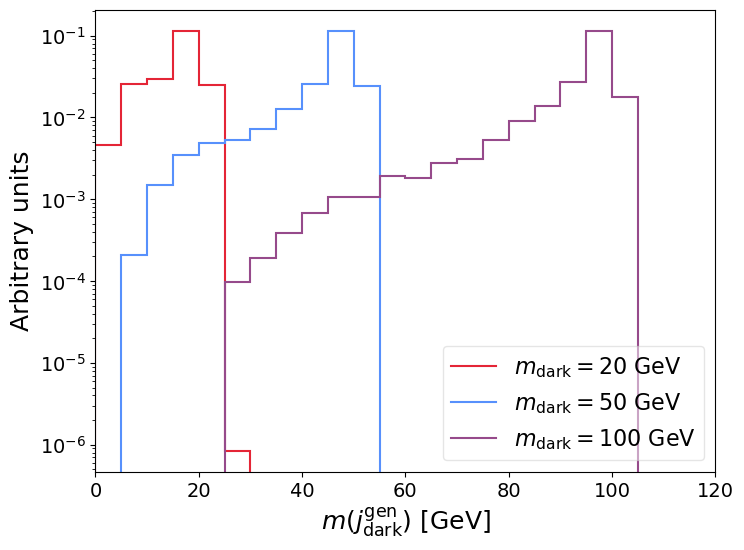

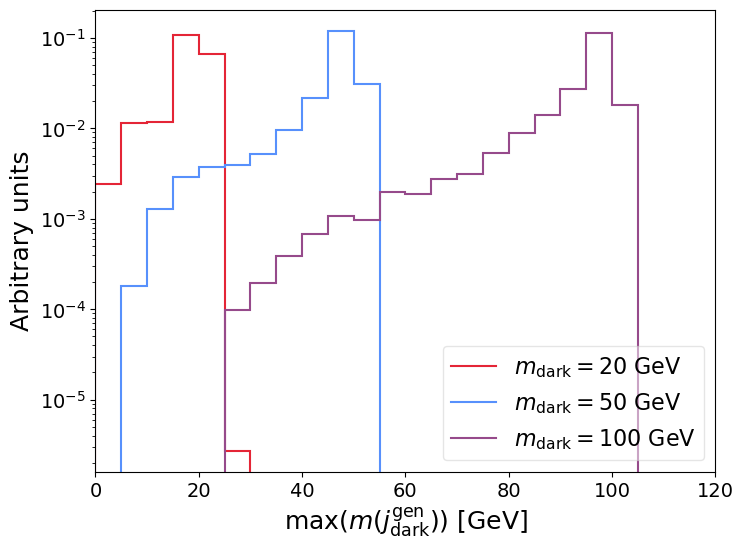

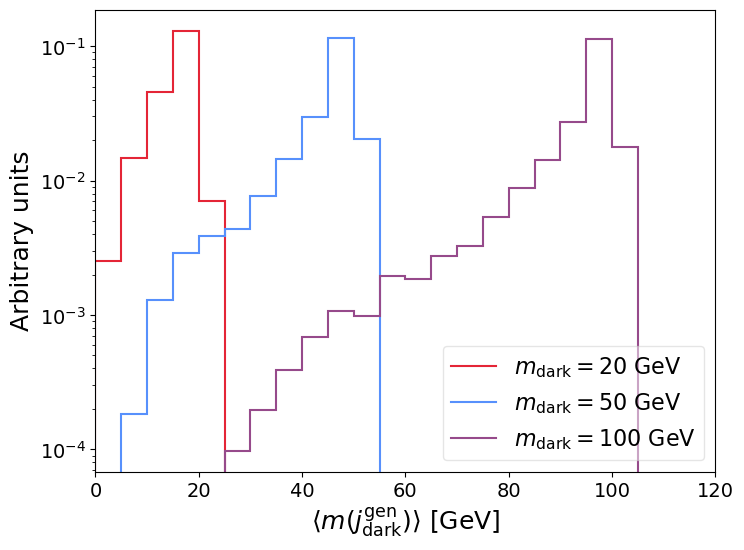

In [23]:
for hname,hists in allhists:
    fig, ax = plt.subplots(figsize=(8,6))
    for l,h in hists.items():
        hep.histplot(h,density=True,ax=ax,label=l)
    ax.set_xlim(0,120)
    ax.set_yscale("log")
    ax.set_ylabel("Arbitrary units")
    #ax.set_ylim(1,2e5)
    ax.legend(framealpha=0.5)
    plt.savefig('{}.pdf'.format(hname),bbox_inches='tight')